<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/Project_Bearing_Nasa_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


In [ ]:
pip install keras

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.0
    Uninstalling tenso

In [2]:
#imports

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(1000)
#from tensorflow import set_random_seed

from keras.layers import Input, Dropout, Dense
#from keras.layers.core import Dense
from keras.models import Model, Sequential, load_model
from keras import regularizers
from keras.models import model_from_json



Phân Tích Dữ Liệu


In [6]:
data = '/content/drive/MyDrive/Colab Notebooks/Project_Cuối_Kỳ_DSP/dataset_2/1st_test/3rd_test/4th_test/txt'
merged_data = pd.DataFrame()

for filename in os.listdir(data):
    print(filename)
    dataset=pd.read_csv(os.path.join(data, filename), sep='\t')
    dataset_mean_abs = np.array(dataset.abs().mean())
    dataset_mean_abs = pd.DataFrame(dataset_mean_abs.reshape(1, 4))
    dataset_mean_abs.index = [filename]
    merged_data = pd.concat([merged_data, dataset_mean_abs])

merged_data.columns = ['Bearing 1','Bearing 2','Bearing 3','Bearing 4']


Streaming output truncated to the last 5000 lines.
2004.04.06.21.01.57
2004.04.06.21.11.57
2004.04.06.19.41.57
2004.04.06.20.21.57
2004.04.06.20.11.57
2004.04.06.20.31.57
2004.04.06.19.21.57
2004.04.06.21.31.57
2004.04.06.20.51.57
2004.04.06.20.01.57
2004.04.06.19.51.57
2004.04.06.19.31.57
2004.04.06.23.21.57
2004.04.06.22.01.57
2004.04.06.21.51.57
2004.04.06.22.11.57
2004.04.06.23.41.57
2004.04.06.23.01.57
2004.04.06.23.11.57
2004.04.06.22.41.57
2004.04.06.23.31.57
2004.04.06.22.31.57
2004.04.06.22.21.57
2004.04.06.22.51.57
2004.04.07.01.01.57
2004.04.07.00.51.57
2004.04.06.23.51.57
2004.04.07.02.01.57
2004.04.07.02.11.57
2004.04.07.01.31.57
2004.04.07.00.11.57
2004.04.07.01.21.57
2004.04.07.00.21.57
2004.04.07.00.01.57
2004.04.07.01.11.57
2004.04.07.02.21.57
2004.04.07.01.51.57
2004.04.07.00.31.57
2004.04.07.00.41.57
2004.04.07.01.41.57
2004.04.07.04.51.57
2004.04.07.02.31.57
2004.04.07.04.11.57
2004.04.07.02.51.57
2004.04.07.03.01.57
2004.04.07.04.01.57
2004.04.07.03.51.57
2004.04.0

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
merged_data.index = pd.to_datetime(merged_data.index, format='%Y-%m-%d %H:%M:%S' )

merged_data = merged_data.sort_index()
merged_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Project_Cuối_Kỳ_DSP/dataset_2/1st_testmerged_dataset_BearingTest_3.csv')
merged_data.head()

,Bearing 1,Bearing 2,Bearing 3,Bearing 4
2004-03-04 09:27:46,0.061630,0.075278,0.051991,0.043475
2004-03-04 09:32:46,0.060774,0.072206,0.052239,0.042039
2004-03-04 09:42:46,0.062195,0.072886,0.054809,0.041360
2004-03-04 09:52:46,0.062994,0.073433,0.054261,0.043126
2004-03-04 10:02:46,0.061945,0.073006,0.053237,0.042617


Distributions bearing 1


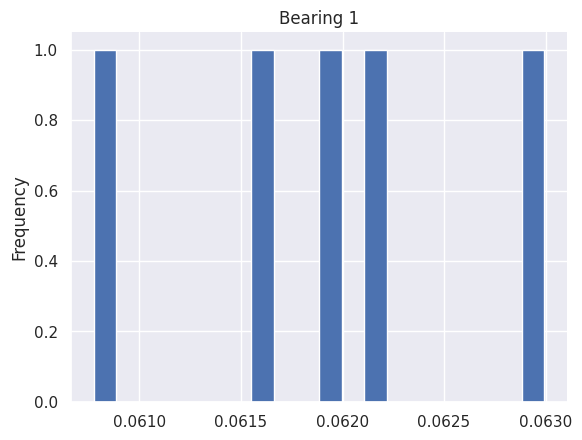

In [14]:
from matplotlib import pyplot as plt
_df_0['Bearing 1'].plot(kind='hist', bins=20, title='Bearing 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

Values Bearing 1

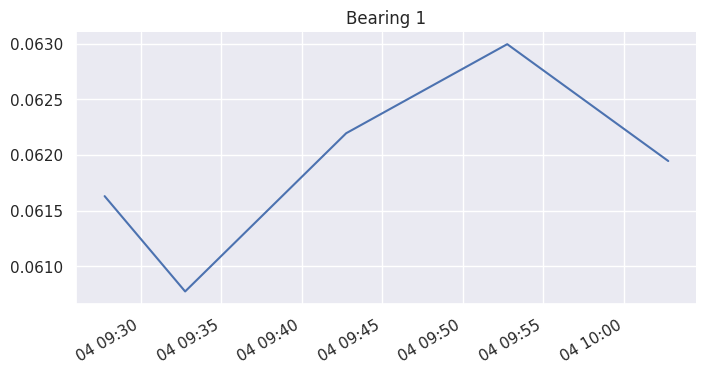

In [13]:
from matplotlib import pyplot as plt
_df_7['Bearing 1'].plot(kind='line', figsize=(8, 4), title='Bearing 1')
plt.gca().spines[['top', 'right']].set_visible(False)

<ipython-input-9-4063a2e3c8cb>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  dataset_test = merged_data['2004-03-15 20:00:00':]


<Axes: >

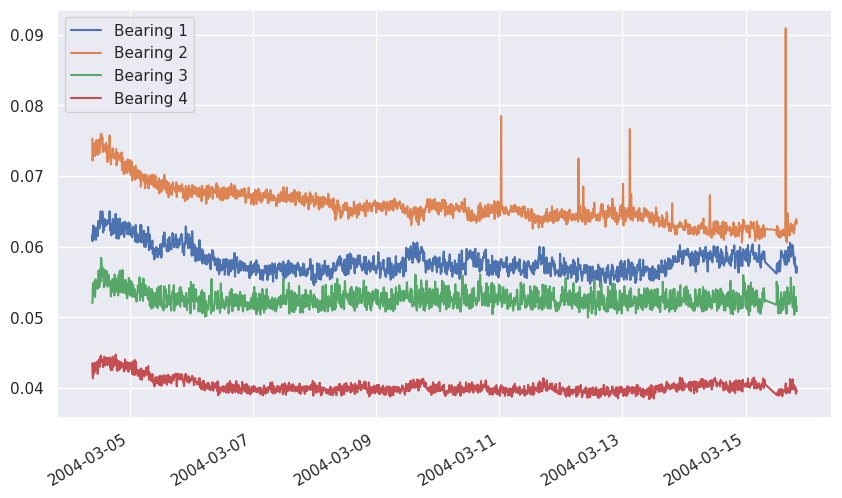

In [9]:
dataset_train = merged_data['2004-03-04 09:27:46':'2004-03-15 20:00:00']
dataset_test = merged_data['2004-03-15 20:00:00':]
dataset_train.plot(figsize = (10,6))

Tiền Xử Lý Dữ Liệu

In [19]:
# Create a MinMaxScaler instance
scaler = preprocessing.MinMaxScaler()

# Apply the scaler to the training dataset and create a new DataFrame
X_train= pd.DataFrame(scaler.fit_transform(dataset_train),
                               columns=dataset_train.columns,
                               index=dataset_train.index)

# Randomly shuffle the training data
X_train_shuffled = X_train.sample(frac=1)

# Apply the scaler to the testing dataset and create a new DataFrame
X_test = pd.DataFrame(scaler.transform(dataset_test),
                              columns=dataset_test.columns,
                              index=dataset_test.index)


In [20]:
from sklearn.decomposition import PCA

# Create PCA instance with 2 components and svd_solver set to 'full'
pca = PCA(n_components=2, svd_solver='full')

# Fit and transform the training data
X_train_pca= pd.DataFrame(pca.fit_transform(X_train), index=X_train.index)

# Transform the test data
X_test_pca= pd.DataFrame(pca.transform(X_test), index=X_test.index)
